# Importing the libraries


In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [138]:
df = pd.read_csv("Ames_HousePrice.csv")
df.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


Rearrange Columns

In [139]:
cols = list(df.columns.values)
cols.pop(cols.index('SalePrice'))
df = df[cols+['SalePrice']]

In [140]:
df.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCon

In [141]:
df.shape

(2580, 82)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2580 non-null   int64  
 1   PID            2580 non-null   int64  
 2   GrLivArea      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseSty

In [143]:
null_counts = df.isnull().sum() / df.shape[0] * 100
null_counts[null_counts > 0].sort_values(ascending=False) 

PoolQC          99.651163
MiscFeature     96.240310
Alley           93.488372
Fence           79.651163
FireplaceQu     48.100775
LotFrontage     17.906977
GarageCond       5.000000
GarageQual       5.000000
GarageFinish     5.000000
GarageYrBlt      5.000000
GarageType       4.922481
BsmtExposure     2.751938
BsmtFinType2     2.713178
BsmtFinType1     2.674419
BsmtQual         2.674419
BsmtCond         2.674419
MasVnrArea       0.542636
MasVnrType       0.542636
BsmtHalfBath     0.077519
BsmtFullBath     0.077519
TotalBsmtSF      0.038760
BsmtUnfSF        0.038760
GarageCars       0.038760
GarageArea       0.038760
BsmtFinSF2       0.038760
BsmtFinSF1       0.038760
Electrical       0.038760
dtype: float64

# Preprocessing

## Drop columns

MiscFeature seems like it is a column indicating if it has a shed, garage, or other

In [144]:
# drop columns with over 40% missing values
df.drop(["Unnamed: 0", "PID", "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], inplace=True, axis=1)

In [145]:
df.shape

(2580, 75)

## Missing Data

In [146]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

LotFrontage     462
GarageYrBlt     129
GarageQual      129
GarageFinish    129
GarageCond      129
GarageType      127
BsmtExposure     71
BsmtFinType2     70
BsmtQual         69
BsmtCond         69
BsmtFinType1     69
MasVnrArea       14
MasVnrType       14
BsmtHalfBath      2
BsmtFullBath      2
Electrical        1
BsmtUnfSF         1
BsmtFinSF2        1
GarageCars        1
GarageArea        1
BsmtFinSF1        1
TotalBsmtSF       1
dtype: int64

Handling non-numeric data and numeric columns seperately + using mean, mode on special columns

In [147]:
#find where GarageType is NA and missing values in GarageYrBltm, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond

In [148]:
# catcol = ["GarageQual","GarageFinish", "GarageCond", "GarageType", "BsmtExposure", "BsmtFinType2", "BsmtQual", "BsmtCond", "BsmtFinType1", "MasVnrType", "Electrical"]

catcol = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle",
          "RoofStyle","RoofMatl", "Exterior1st","Exterior2nd","MasVnrType", "ExterQual",	"ExterCond",	"Foundation",	"BsmtQual",	"BsmtCond",	"BsmtExposure",	
          "BsmtFinType1", "BsmtFinType2", "Heating",	"HeatingQC",	"CentralAir",	"Electrical", "KitchenQual", "Functional", "GarageType",
          "GarageFinish", "GarageQual",	"GarageCond",	"PavedDrive", "SaleType",	"SaleCondition", "LotConfig"]

numcol_mean = ["LotFrontage"]

numcol = ["MasVnrArea", "BsmtUnfSF", "BsmtFinSF2", "GarageCars", "GarageArea",
          "BsmtFinSF1", "TotalBsmtSF", "BsmtHalfBath", "BsmtFullBath", "GarageYrBlt"]

#median
notsure= ["GarageYrBlt"] # "BsmtHalfBath", "BsmtFullBath"

In [149]:
pd.set_option('display.max_columns', None)
df.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,856,30,RL,NaN,7890,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,0,3,2010,WD,Normal,126000
1,1049,120,RL,42.0,4235,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,0,2,2009,WD,Normal,139500
2,1001,30,C (all),60.0,6060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,0,11,2007,WD,Normal,124900
3,1039,70,RL,80.0,8146,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,0,5,2009,WD,Normal,114000
4,1665,60,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,0,11,2009,WD,Normal,227000


In [150]:
df.loc[df["LotFrontage"].isna()]

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,856,30,RL,NaN,7890,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,0,3,2010,WD,Normal,126000
13,1394,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1.0,0.0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD,Normal,159000
18,1610,20,RL,NaN,10603,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2001,Gable,CompShg,Plywood,Plywood,BrkFace,28.0,TA,TA,PConc,TA,TA,Mn,ALQ,1200.0,Unf,0.0,410.0,1610.0,GasA,Gd,Y,SBrkr,1610,0,0,1.0,0.0,2,0,3,1,Gd,6,Typ,2,Attchd,1977.0,RFn,2.0,480.0,TA,TA,Y,168,68,0,0,0,0,0,2,2010,WD,Normal,205000
27,1573,160,FV,NaN,2117,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,216.0,Gd,TA,PConc,Gd,TA,No,GLQ,378.0,Unf,0.0,378.0,756.0,GasA,Ex,Y,SBrkr,769,804,0,0.0,0.0,2,1,3,1,Gd,5,Typ,0,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,0,6,2010,WD,Normal,177500
28,2090,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,1.0,0.0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,1482,80,RL,NaN,9125,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,BrkFace,170.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,812,670,0,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1992.0,Fin,2.0,392.0,TA,TA,Y,100,25,0,0,0,0,0,7,2007,WD,Normal,163900
2563,1584,90,RL,NaN,8917,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1967,1967,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1584.0,1584.0,GasA,TA,Y,SBrkr,1584,0,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,Detchd,1967.0,Unf,2.0,506.0,TA,TA,Y,0,0,0,0,0,0,0,10,2006,WD,Normal,119000
2575,952,30,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,0,5,2009,WD,Normal,121000
2576,1733,20,RL,NaN,13680,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,139600


In [151]:
df.loc[df['LotFrontage'].isna()][['LotFrontage','Street']] #mean

,LotFrontage,Street
0,NaN,Pave
13,NaN,Pave
18,NaN,Pave
27,NaN,Pave
28,NaN,Pave
...,...,...
2561,NaN,Pave
2563,NaN,Pave
2575,NaN,Pave
2576,NaN,Pave


In [152]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)
for col in numcol :
  imputer.fit_transform(df[[col]])
  df[col] = imputer.transform(df[[col]])

In [153]:
def impute_nan_create_category(df,col):
    #mode
     df[col] = np.where(df[col].isnull(),"Unknown",df[col])

## Call function to create new category for variables
for col in catcol:
    impute_nan_create_category(df,col)

In [154]:
df.shape

(2580, 75)

In [155]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

LotFrontage    462
dtype: int64

In [156]:
lot_mean = ["LotFrontage"]

from sklearn.impute import SimpleImputer

lot_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in lot_mean :
  lot_mean_imputer.fit_transform(df[[col]])
  df[col] = lot_mean_imputer.transform(df[[col]])

In [157]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

### Look at heatmap before encoding

<AxesSubplot:>

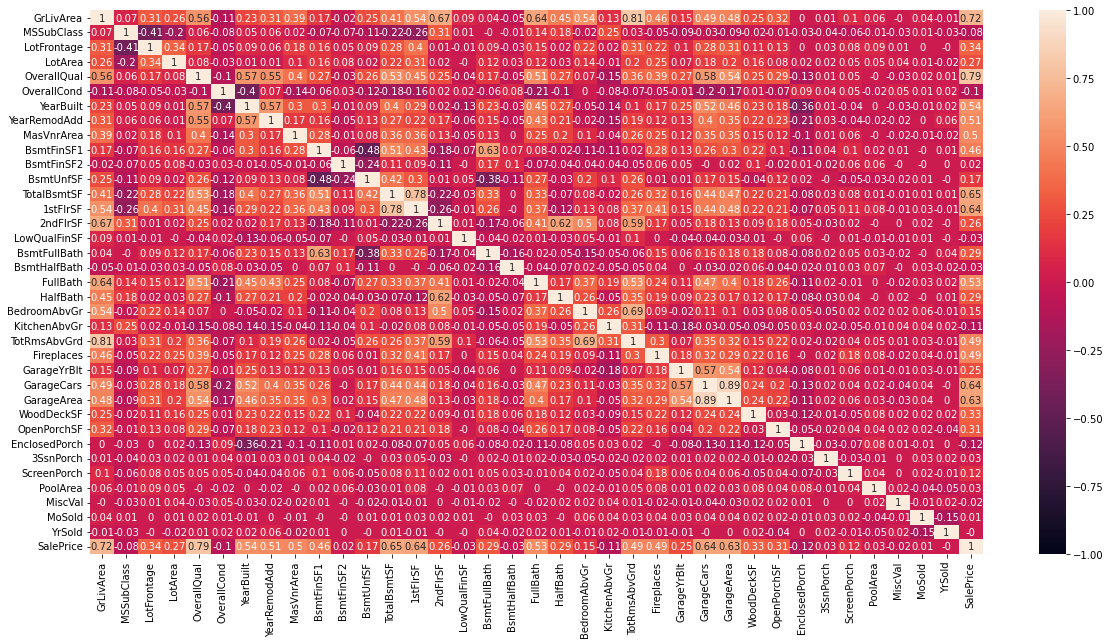

In [158]:
corr = df.corr()

f, ax = plt.subplots(figsize=(20,10))

sns.heatmap(corr.round(2), 
        xticklabels=corr.columns,
        yticklabels=corr.columns,vmin=-1,vmax=1,annot=True)

In [86]:
df_obj_cols = df_obj.columns
df_obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

## Encoding Categorical Data

In [87]:
df = pd.get_dummies(df, columns = catcol, drop_first=True)
df

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Po,BsmtQual_TA,BsmtQual_Unknown,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unknown,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unknown,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_Unknown,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_Unknown,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Electrical_Unknown,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotCo

In [88]:
df.shape

(2580, 251)

In [ ]:
#detect outliers only in numerical? 
#how to create boxplot of all independent features vs target


# Observing data

In [89]:
import scipy 

def get_corrs(*exclude, df, targetcol):
    corrs = [] 
    for col in df.columns:
        if col not in exclude:
            corr, p = scipy.stats.pearsonr(df[targetcol], df[col]) #pvalue
            newrow = {'col':col, 'corr':corr, 'pval':p}
            corrs.append(newrow)
    resultdf = pd.DataFrame(corrs)
    resultdf.sort_values(by = 'corr', ascending = False, inplace = True)
    resultdf = resultdf.reset_index(drop = True)
    return resultdf

In [92]:
df.isna().sum()

GrLivArea                0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_Partial    0
LotConfig_CulDSac        0
LotConfig_FR2            0
LotConfig_FR3            0
LotConfig_Inside         0
Length: 251, dtype: int64

In [93]:
sale_corr = corr[['SalePrice']]
sale_corr['SalePrice'] = sale_corr['SalePrice'].abs()
sale_corr[['SalePrice']].sort_values(by='SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790501
GrLivArea,0.719981
TotalBsmtSF,0.652494
1stFlrSF,0.642613
GarageCars,0.638424
GarageArea,0.634669
YearBuilt,0.544370
FullBath,0.534982
YearRemodAdd,0.514309


<AxesSubplot:>

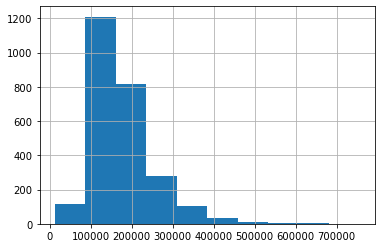

In [94]:
df['SalePrice'].hist()

###!!!!! Log transformation of SalePrice !!!!

- Do a log transform before splitting to train and test? 
- what happens when we get new data, should we be creating a function to log new data as well?

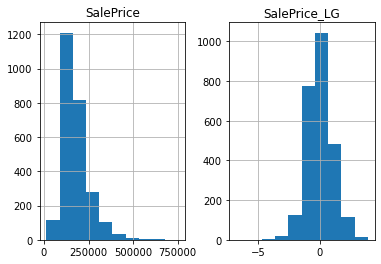

In [95]:
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(df[['SalePrice']])

# Apply the power transform to the data
df['SalePrice_LG'] = pow_trans.transform(df[['SalePrice']])

# Plot the data before and after the transformation
df[['SalePrice', 'SalePrice_LG']].hist()
plt.show()

### !!!!! Statistical outlier removal !!!!!
- remove outlier for all columns or just target ?
  - if you remove outliers for this data set, how would you remove outliers for future data
      - Kaggle data set already split, what would you do in this case
- save another df?

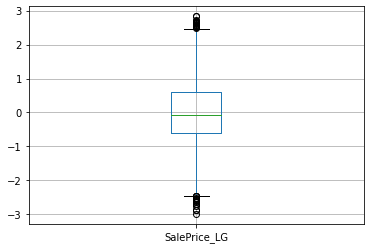

In [96]:
# Find the mean and standard dev
std = df['SalePrice_LG'].std()
mean = df['SalePrice_LG'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = df[(df['SalePrice_LG'] < upper) & (df['SalePrice_LG'] > lower)]

# The trimmed box plot
trimmed_df[['SalePrice_LG']].boxplot()
plt.show()

# Splitting dataset into Training and Test

In [97]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

np.random.seed(100)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Selection

## Decision Tree Regression

### Training the Decision Tree Regression model on the Training set

In [98]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Predicting the Test set results

In [99]:
dt_pred = dt_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((dt_pred.reshape(len(dt_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[166500. 166000.]
 [180000. 180000.]
 [119000. 119000.]
 ...
 [156500. 156500.]
 [168000. 168165.]
 [105000. 104500.]]


### Evaluating the Model Performance

In [100]:
from sklearn.metrics import r2_score
r2_score(y_test, dt_pred)
print(f'R-Squared of Train set: {dt_regressor.score(X_train,y_train)}')
print(f'R-Squared of Test set: {dt_regressor.score(X_test,y_test)}')

R-Squared of Train set: 1.0
R-Squared of Test set: 0.9995192866592922


## Multiple Linear Regression

### Training the Multiple Linear Regression model on the Training set

In [101]:
from sklearn.linear_model import LinearRegression
ml_regressor = LinearRegression()
ml_regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results

In [102]:
ml_pred = ml_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((ml_pred.reshape(len(ml_pred),1), y_test.values.reshape(len(y_test),1)),1))

# predictions; real results

[[158620.05 166000.  ]
 [180623.24 180000.  ]
 [116838.   119000.  ]
 ...
 [151694.5  156500.  ]
 [171660.56 168165.  ]
 [107579.   104500.  ]]


### Evaluating the Model Performance

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test, ml_pred)
print(f'R-Squared of Train set: {ml_regressor.score(X_train,y_train)}')
print(f'R-Squared of Test set: {ml_regressor.score(X_test,y_test)}')

R-Squared of Train set: 0.9673289753658479
R-Squared of Test set: -5583601.700731554


## Random Forest

### Feature Scaling

In [104]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train1 = sc.fit_transform(X_train)
#X_test1 = sc.transform(X_test)

### Training the Decision Tree Regression model on the Training set

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#rf = RandomForestRegressor(n_estimators = 49, max_depth=2, random_state=0)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

### Predicting the Test set results

In [119]:
rf_pred = rf.predict(X_test)

#print(f"R Squared Score: {r2_score(y_test, rf_pred)}")
print(f'R-Squared of Train set: {rf.score(X_train,y_train)}')
print(f'R-Squared of Test set: {rf.score(X_test,y_test)}')

rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print("Root Mean Squared Error: {}".format(rmse))

R-Squared of Train set: 0.9993710735710184
R-Squared of Test set: 0.9995619450673107
Root Mean Squared Error: 1641.577595352642


## Support Vector Regression

###Feature scaling

In [123]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_svr = sc_X.fit_transform(X_train)
y_train_svr = sc_y.fit_transform(y_train.values.reshape(-1,1))

### Training SVR model on the Training set

In [124]:
from sklearn.svm import SVR
svr_regressor = SVR()
svr_regressor.fit(X_train_svr, y_train_svr)
#svr_regressor = SVR(kernel = 'rbf')
#svr_regressor.fit(X_train2, y_train2)

# svr_regressor_cv = GridSearchCV(svr_regressor, param_grid, cv=5)
# svr_regressor_cv.fit(X_train2, y_train2)

SVR()

In [125]:
svr_pred = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(X_test)).reshape(-1, 1))
np.set_printoptions(precision=2)
print(np.concatenate((svr_pred.reshape(len(svr_pred),1), svr_pred.reshape(len(y_test),1)),1))

[[154426.47 154426.47]
 [182196.95 182196.95]
 [125808.6  125808.6 ]
 ...
 [173245.99 173245.99]
 [173778.89 173778.89]
 [ 94610.5   94610.5 ]]


In [126]:
from sklearn.metrics import r2_score
r2_score(y_test, svr_pred)
print(f'R-Squared of Train set: {svr_regressor.score(X_train_svr,y_train_svr)}')
print(f'R-Squared of Test set: {svr_regressor.score(X_test,y_test)}')

R-Squared of Train set: 0.9361386790581704
R-Squared of Test set: -5.439521779326903


### Grid Search

In [121]:
from sklearn.model_selection import GridSearchCV

#Setup hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [110]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(svr_regressor_cv.best_params_)) 
print("Best score is {}".format(svr_regressor_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.8405436115459166


## Lasso

### Training

In [127]:
from sklearn import linear_model
#lasso_reg = linear_model.Lasso(alpha = 60, max_iter = 100, tol = 0.1)
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [128]:
lasso_pred = lasso_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((lasso_pred.reshape(len(lasso_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[158725.19 166000.  ]
 [180608.91 180000.  ]
 [116691.49 119000.  ]
 ...
 [152818.26 156500.  ]
 [171613.41 168165.  ]
 [107891.81 104500.  ]]


### Evaluating Performance

In [129]:
print(f'R-Squared of Train set: {lasso_reg.score(X_train, y_train)}')
print(f'R-Squared of Test set: {lasso_reg.score(X_test, y_test)}')

R-Squared of Train set: 0.9672789657390227
R-Squared of Test set: 0.9593706241269941


## Ridge

### Training

In [130]:
from sklearn.linear_model import Ridge

#ridge_reg = Ridge(alpha = 2.2, max_iter=100, tol = 0.1)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [131]:
ridge_pred = ridge_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((ridge_pred.reshape(len(ridge_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[159096.41 166000.  ]
 [180154.45 180000.  ]
 [116850.15 119000.  ]
 ...
 [154119.9  156500.  ]
 [171882.39 168165.  ]
 [108266.84 104500.  ]]


### Evaluating Performance

In [132]:
print(f'R-Squared of Train set: {ridge_reg.score(X_train, y_train)}')
print(f'R-Squared of Test set: {ridge_reg.score(X_test, y_test)}')

R-Squared of Train set: 0.9666638512325014
R-Squared of Test set: 0.9606113990177585


## Elastic Net

In [133]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

#enet_reg = ElasticNet(alpha = 0.01)
enet_reg = ElasticNet()
enet_reg.fit(X_train, y_train) 
pred_train_enet= enet_reg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(f'R-Squared of Train set: {r2_score(y_train, pred_train_enet)}')

pred_test_enet= enet_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(f'R-Squared of Test set: {r2_score(y_test, pred_test_enet)}')

23352.333233274265
R-Squared of Train set: 0.9006506446689709
25217.138716284786
R-Squared of Test set: 0.8966293236858591


## XGBoost

In [1]:
!pip3 install xgboost

In [134]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

data_dmatrix = xgb.DMatrix(data=X,label=y)

xg_reg = xgb.XGBRegressor()

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2379.184823


In [135]:
print(f'R-Squared of Train set: {xg_reg.score(X_train, y_train)}')
print(f'R-Squared of Test set: {xg_reg.score(X_test, y_test)}')

R-Squared of Train set: 0.9999918278071434
R-Squared of Test set: 0.9990798426399823
